In [9]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [10]:
#__________ Leemos el modelo DNN __________
#Configuración del modelo
config = "/content/drive/MyDrive/Darknet/Darknet/cfg/yolov3.cfg"
#Pesos
weights = "/content/drive/MyDrive/Darknet/yolov3.weights"
#Etiquetas
Labels = open("/content/drive/MyDrive/Darknet/Darknet/data/coco.names").read().split("\n")
print(Labels, len(Labels))
colors = np.random.randint(0, 255, size = (len(Labels), 3), dtype = 'uint8')
print("Colors.shape", colors.shape)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', ''] 81
Colors.shape (81, 3)


In [11]:
#Cargamos el modelo
net = cv2.dnn.readNetFromDarknet(config, weights)

#Leemos la imagen y la mostramos
image = cv2.imread('/content/drive/MyDrive/Darknet/Imagenes/birds.jpg')
#cv2_imshow(image)

In [12]:
#Hacemos el preprocesamiento de la imagen
height, width, _ = image.shape
#Creamos un blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), # (416, 416) es el tamaño de la imagen que la red espera
                             swapRB = True, crop = False) #Crop es para recortar la imagen al final
print('blob.shape', blob.shape) # 1 (una imagen), 3 (los tres canales RGB), 416, 416 (ancho y alto)

blob.shape (1, 3, 416, 416)


In [ ]:
#__________ Detección y predicción __________
ln = net.getLayerNames()
#print('ln', ln)
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
#print('\nln', ln)
net.setInput(blob)
outputs = net.forward(ln)
#print('outputs: ', outputs)

boxes = []
confidences = []
classIDs = []

for output in outputs:
  for detection in output:
     scores = detection[5:] # Valores correspondientes a las clases
     classID = np.argmax(scores) #Guardamos el valor máximo de confianza de las 81 clases
     confidence = scores[classID]

     if confidence > 0.4:
       #print('Detection: ', detection)
       #print('ClassID', classID)
       box = detection[:4] * np.array([width, height, width, height])
       #print('box', box)
       (x_center, y_center, w, h) = box.astype('int')
       #print(_center, y_center, w, h)
       x = int(x_center - (w/2))
       y = int(y_center - (h/2))
       #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
       #Puesto que para objeto tenemos varios rectangulos utilizaremos la función Non-Maximum Suppression (NMS)
       boxes.append([x, y, w, h])
       confidences.append(float(confidence))
       classIDs.append(classID)
idx = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold = 0.4,nms_threshold=0.5)
#print('idx', idx)

if len(idx) > 0:
  for i in idx:
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])

    color = colors[classIDs[i]].tolist()
    text = "{}: {:.3f}".format(Labels[classIDs[i]], confidences[i])
    cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                2, color, 5)

cv2_imshow(image)

In [ ]:
#Leemos la imagen y la mostramos
image = cv2.imread('/content/drive/MyDrive/Darknet/Imagenes/Dog_Cat.jpg')
cv2_imshow(image)


#Hacemos el preprocesamiento de la imagen
height, width, _ = image.shape
#Creamos un blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), # (416, 416) es el tamaño de la imagen que la red espera
                             swapRB = True, crop = False) #Crop es para recortar la imagen al final
print('blob.shape', blob.shape) # 1 (una imagen), 3 (los tres canales RGB), 416, 416 (ancho y alto)


#__________ Detección y predicción __________
ln = net.getLayerNames()
#print('ln', ln)
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
#print('\nln', ln)
net.setInput(blob)
outputs = net.forward(ln)
print('outputs: ', outputs)

boxes = []
confidences = []
classIDs = []

for output in outputs:
  for detection in output:
     scores = detection[5:] # Valores correspondientes a las clases
     classID = np.argmax(scores) #Guardamos el valor máximo de confianza de las 81 clases
     confidence = scores[classID]

     if confidence > 0.5:
       #print('Detection: ', detection)
       #print('ClassID', classID)
       box = detection[:4] * np.array([width, height, width, height])
       #print('box', box)
       (x_center, y_center, w, h) = box.astype('int')
       #print(_center, y_center, w, h)
       x = int(x_center - (w/2))
       y = int(y_center - (h/2))
       #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
       #Puesto que para objeto tenemos varios rectangulos utilizaremos la función Non-Maximum Suppression (NMS)
       boxes.append([x, y, w, h])
       confidences.append(float(confidence))
       classIDs.append(classID)
idx = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold = 0.4,nms_threshold=0.4)
print('idx', idx)

if len(idx) > 0:
  for i in idx:
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])

    color = colors[classIDs[i]].tolist()
    text = "{}: {:.3f}".format(Labels[classIDs[i]], confidences[i])
    cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                1.5, color, 5)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

blob.shape (1, 3, 416, 416)


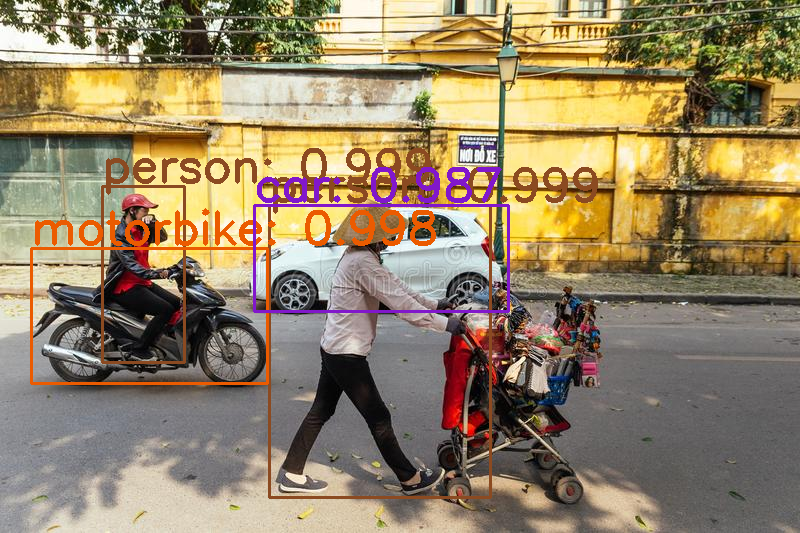

In [ ]:
#Leemos la imagen y la mostramos
image = cv2.imread('/content/drive/MyDrive/Darknet/Imagenes/Varios.jpg')
#cv2_imshow(image)


#Hacemos el preprocesamiento de la imagen
height, width, _ = image.shape
#Creamos un blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), # (416, 416) es el tamaño de la imagen que la red espera
                             swapRB = True, crop = False) #Crop es para recortar la imagen al final
print('blob.shape', blob.shape) # 1 (una imagen), 3 (los tres canales RGB), 416, 416 (ancho y alto)


#__________ Detección y predicción __________
ln = net.getLayerNames()
#print('ln', ln)
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
#print('\nln', ln)
net.setInput(blob)
outputs = net.forward(ln)
#print('outputs: ', outputs)

boxes = []
confidences = []
classIDs = []

for output in outputs:
  for detection in output:
     scores = detection[5:] # Valores correspondientes a las clases
     classID = np.argmax(scores) #Guardamos el valor máximo de confianza de las 81 clases
     confidence = scores[classID]

     if confidence > 0.5:
       #print('Detection: ', detection)
       #print('ClassID', classID)
       box = detection[:4] * np.array([width, height, width, height])
       #print('box', box)
       (x_center, y_center, w, h) = box.astype('int')
       #print(_center, y_center, w, h)
       x = int(x_center - (w/2))
       y = int(y_center - (h/2))
       #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
       #Puesto que para objeto tenemos varios rectangulos utilizaremos la función Non-Maximum Suppression (NMS)
       boxes.append([x, y, w, h])
       confidences.append(float(confidence))
       classIDs.append(classID)
idx = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold = 0.4,nms_threshold=0.4)
#print('idx', idx)

if len(idx) > 0:
  for i in idx:
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])

    color = colors[classIDs[i]].tolist()
    text = "{}: {:.3f}".format(Labels[classIDs[i]], confidences[i])
    cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                1.5, color, 3)

cv2_imshow(image)